In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt



In [7]:
af2_traj = md.load('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week7-Alphafold/Inputs/ATP/fold_class2_model_0.cif')
af3_traj = md.load('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week7-Alphafold/Inputs/AF2/test_dd6ec_unrelaxed_rank_001_alphafold2_multimer_v3_model_1_seed_000.pdb')


In [8]:
af2_indices = af2_traj.topology.select('chainid 0')  
af3_indices = af3_traj.topology.select('chainid 0')



AF2 indices: [   0    1    2 ... 1040 1041 1042], Length: 1043
AF3 indices: [   0    1    2 ... 1040 1041 1042], Length: 1043


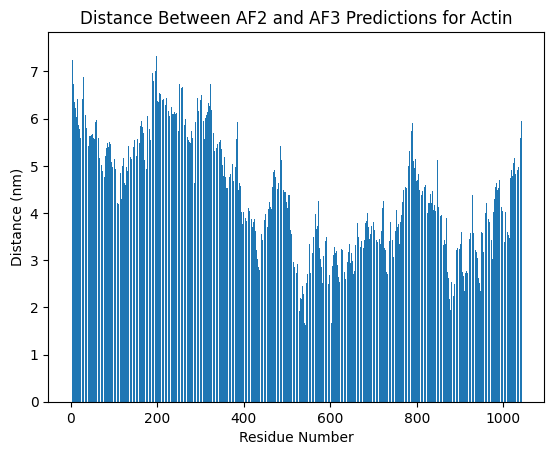

In [15]:
print(f"AF2 indices: {af2_indices}, Length: {len(af2_indices)}")
print(f"AF3 indices: {af3_indices}, Length: {len(af3_indices)}")

if len(af2_indices) == 0 or len(af3_indices) == 0:
    print("Error: No valid indices found.")
else:
    min_length = min(len(af2_indices), len(af3_indices))
    af2_indices = af2_indices[:min_length]
    af3_indices = af3_indices[:min_length]

    distances = np.linalg.norm(af2_traj.xyz[0][af2_indices] - af3_traj.xyz[0][af3_indices], axis=1)

    # Plotting distances
    plt.bar(range(min_length), distances)
    plt.xlabel('Residue Number')
    plt.ylabel('Distance (nm)')
    plt.title('Distance Between AF2 and AF3 Predictions for Actin')
    plt.show()

    af2_residues = list(af2_traj.topology.residues)
    af3_residues = list(af3_traj.topology.residues)

    significant_diff_threshold = 0.5  # Adjust this threshold as needed
    significant_differences = np.where(distances > significant_diff_threshold)[0]

    # if len(significant_differences) > 0:
    #     print("Residues with significant differences:")
    #     for idx in significant_differences:
    #         if idx < len(af2_indices):
    #             res_index_af2 = af2_indices[idx]
    #             if res_index_af2 < len(af2_residues):  # Check against the list of residues
    #                 res_name_af2 = af2_residues[res_index_af2].name
    #                 print(f"Residue {res_name_af2} at index {res_index_af2}: Distance = {distances[idx]:.2f} nm")
    #             else:
    #                 print(f"Index {res_index_af2} is out of range for AF2 residues.")
    # else:
    #     print("No residues with significant differences found.")
